The goal of the research is to determine if there are certain matches in the daily value changes between the NASDAQ index and the value of Bitcoin
The research was done on a small sample and can be expanded

In [34]:
# Import the required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

cufflinks.go_offline()

In [35]:
# Import data
# Import two independent tables and then merge them on date
df1 = pd.read_csv("BTC.csv")
df2 = pd.read_csv("nasdaq.csv")
df = df1.merge(df2, on="Date")

In [36]:
# Rename the target variables
df.rename(
    columns={"Close_x": "Close_BTC", "Close_y": "Close_nasdaq"},
    inplace=True,
)

df.head()

,Date,Open_x,High_x,Low_x,Close_BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_nasdaq,Adj Close_y,Volume_y
0,2019-02-25,3771.620117,3885.060059,3771.530029,3845.510010,3845.510010,185036583,7585.299805,7602.689941,7551.609863,7554.459961,7554.459961,2399410000
1,2019-02-26,3845.510010,3852.659912,3791.899902,3817.879883,3817.879883,126868886,7535.290039,7573.220215,7524.310059,7549.299805,7549.299805,2305760000
2,2019-02-27,3817.879883,3851.840088,3699.530029,3830.719971,3830.719971,175069054,7526.419922,7562.290039,7485.390137,7554.509766,7554.509766,2430790000
3,2019-02-28,3830.719971,3909.860107,3798.000000,3823.370117,3823.370117,170646670,7533.310059,7561.899902,7516.479980,7532.529785,7532.529785,2676790000
4,2019-03-01,3823.370117,3866.120117,3822.669922,3831.479980,3831.479980,101774924,7587.450195,7603.040039,7540.750000,7595.350098,7595.350098,2490920000


In [37]:
# Assign a new column with percentage changes for BTC
df['BTCpct1'] =  (df['Close_BTC'] - df['Close_BTC'].shift(+1))/df['Close_BTC'].shift(+1)*100
df.head()

,Date,Open_x,High_x,Low_x,Close_BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_nasdaq,Adj Close_y,Volume_y,BTCpct1
0,2019-02-25,3771.620117,3885.060059,3771.530029,3845.510010,3845.510010,185036583,7585.299805,7602.689941,7551.609863,7554.459961,7554.459961,2399410000,NaN
1,2019-02-26,3845.510010,3852.659912,3791.899902,3817.879883,3817.879883,126868886,7535.290039,7573.220215,7524.310059,7549.299805,7549.299805,2305760000,-0.718504
2,2019-02-27,3817.879883,3851.840088,3699.530029,3830.719971,3830.719971,175069054,7526.419922,7562.290039,7485.390137,7554.509766,7554.509766,2430790000,0.336315
3,2019-02-28,3830.719971,3909.860107,3798.000000,3823.370117,3823.370117,170646670,7533.310059,7561.899902,7516.479980,7532.529785,7532.529785,2676790000,-0.191866
4,2019-03-01,3823.370117,3866.120117,3822.669922,3831.479980,3831.479980,101774924,7587.450195,7603.040039,7540.750000,7595.350098,7595.350098,2490920000,0.212113


In [38]:
# Assign a new column with percentage changes for nasdaq
df['nasdaqpct1'] =  (df['Close_nasdaq'] - df['Close_nasdaq'].shift(+1))/df['Close_nasdaq'].shift(+1)*100
df.head()

,Date,Open_x,High_x,Low_x,Close_BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_nasdaq,Adj Close_y,Volume_y,BTCpct1,nasdaqpct1
0,2019-02-25,3771.620117,3885.060059,3771.530029,3845.510010,3845.510010,185036583,7585.299805,7602.689941,7551.609863,7554.459961,7554.459961,2399410000,NaN,NaN
1,2019-02-26,3845.510010,3852.659912,3791.899902,3817.879883,3817.879883,126868886,7535.290039,7573.220215,7524.310059,7549.299805,7549.299805,2305760000,-0.718504,-0.068306
2,2019-02-27,3817.879883,3851.840088,3699.530029,3830.719971,3830.719971,175069054,7526.419922,7562.290039,7485.390137,7554.509766,7554.509766,2430790000,0.336315,0.069013
3,2019-02-28,3830.719971,3909.860107,3798.000000,3823.370117,3823.370117,170646670,7533.310059,7561.899902,7516.479980,7532.529785,7532.529785,2676790000,-0.191866,-0.290952
4,2019-03-01,3823.370117,3866.120117,3822.669922,3831.479980,3831.479980,101774924,7587.450195,7603.040039,7540.750000,7595.350098,7595.350098,2490920000,0.212113,0.833987


In [39]:
# Drop missing values
df.dropna()

,Date,Open_x,High_x,Low_x,Close_BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_nasdaq,Adj Close_y,Volume_y,BTCpct1,nasdaqpct1
1,2019-02-26,3845.510010,3852.659912,3791.899902,3817.879883,3817.879883,126868886,7535.290039,7573.220215,7524.310059,7549.299805,7549.299805,2305760000,-0.718504,-0.068306
2,2019-02-27,3817.879883,3851.840088,3699.530029,3830.719971,3830.719971,175069054,7526.419922,7562.290039,7485.390137,7554.509766,7554.509766,2430790000,0.336315,0.069013
3,2019-02-28,3830.719971,3909.860107,3798.000000,3823.370117,3823.370117,170646670,7533.310059,7561.899902,7516.479980,7532.529785,7532.529785,2676790000,-0.191866,-0.290952
4,2019-03-01,3823.370117,3866.120117,3822.669922,3831.479980,3831.479980,101774924,7587.450195,7603.040039,7540.750000,7595.350098,7595.350098,2490920000,0.212113,0.833987
5,2019-03-04,3812.310059,3831.010010,3705.139893,3731.280029,3731.280029,147245676,7636.620117,7643.660156,7501.560059,7577.569824,7577.569824,2582090000,-2.615176,-0.234094
6,2019-03-05,3731.280029,3893.520020,3720.489990,3874.179932,3874.179932,165062256,7582.290039,7598.660156,7543.540039,7576.359863,7576.359863,2166670000,3.829782,-0.015968
7,2019-03-06,3874.179932,3916.290039,3839.389893,3874.979980,3874.979980,129520549,7575.379883,7579.020020,7499.870117,7505.919922,7505.919922,2256550000,0.020651,-0.929733
8,2019-03-07,3874.979980,3911.760010,3853.199951,3882.610107,3882.610107,146201726,7483.790039,7489.080078,7397.189941,7421.459961,7421.459961,2462690000,0.196908,-1.125245
9,2019-03-08,3882.610107,3932.020020,3804.979980,3868.020020,3868.020020,153405087,7334.350098,7411.520020,7332.919922,7408.140137,7408.140137,2260950000,-0.375780,-0.179477
10,2019-03-11,3929.840088,3941.989990,3849.449951,3874.889893,3874.889893,126998648,7442.560059,7558.229980,7442.399902,7558.060059,7558.060059,2248460000,0.177607,2.023719


In [40]:
# Summarize the probabilities
def text_df(df):
    if (df['BTCpct1'] >0) and (df['nasdaqpct1'] > 0):
        return 1
    elif 0:
        return 0
df['prob'] = df.apply(text_df, axis = 1)

In [41]:
df.head(20)

,Date,Open_x,High_x,Low_x,Close_BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_nasdaq,Adj Close_y,Volume_y,BTCpct1,nasdaqpct1,prob
0,2019-02-25,3771.620117,3885.060059,3771.530029,3845.510010,3845.510010,185036583,7585.299805,7602.689941,7551.609863,7554.459961,7554.459961,2399410000,NaN,NaN,NaN
1,2019-02-26,3845.510010,3852.659912,3791.899902,3817.879883,3817.879883,126868886,7535.290039,7573.220215,7524.310059,7549.299805,7549.299805,2305760000,-0.718504,-0.068306,NaN
2,2019-02-27,3817.879883,3851.840088,3699.530029,3830.719971,3830.719971,175069054,7526.419922,7562.290039,7485.390137,7554.509766,7554.509766,2430790000,0.336315,0.069013,1.0
3,2019-02-28,3830.719971,3909.860107,3798.000000,3823.370117,3823.370117,170646670,7533.310059,7561.899902,7516.479980,7532.529785,7532.529785,2676790000,-0.191866,-0.290952,NaN
4,2019-03-01,3823.370117,3866.120117,3822.669922,3831.479980,3831.479980,101774924,7587.450195,7603.040039,7540.750000,7595.350098,7595.350098,2490920000,0.212113,0.833987,1.0
5,2019-03-04,3812.310059,3831.010010,3705.139893,3731.280029,3731.280029,147245676,7636.620117,7643.660156,7501.560059,7577.569824,7577.569824,2582090000,-2.615176,-0.234094,NaN
6,2019-03-05,3731.280029,3893.520020,3720.489990,3874.179932,3874.179932,165062256,7582.290039,7598.660156,7543.540039,7576.359863,7576.359863,2166670000,3.829782,-0.015968,NaN
7,2019-03-06,3874.179932,3916.290039,3839.389893,3874.979980,3874.979980,129520549,7575.379883,7579.020020,7499.870117,7505.919922,7505.919922,2256550000,0.020651,-0.929733,NaN
8,2019-03-07,3874.979980,3911.760010,3853.199951,3882.610107,3882.610107,146201726,7483.790039,7489.080078,7397.189941,7421.459961,7421.459961,2462690000,0.196908,-1.125245,NaN
9,2019-03-08,3882.610107,3932.020020,3804.979980,3868.020020,3868.020020,153405087,7334.350098,7411.520020,7332.919922,7408.140137,7408.140137,2260950000,-0.375780,-0.179477,NaN


In [42]:
# the probability that both BTC and NASDAQ went up on the same day %
#A/B statistics
((df["prob"] == 1).sum()/(df["prob"] != 1).sum())*100

66.66666666666666

In [43]:
#desc statistic of prob column
df['prob'].describe()

count    8.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: prob, dtype: float64

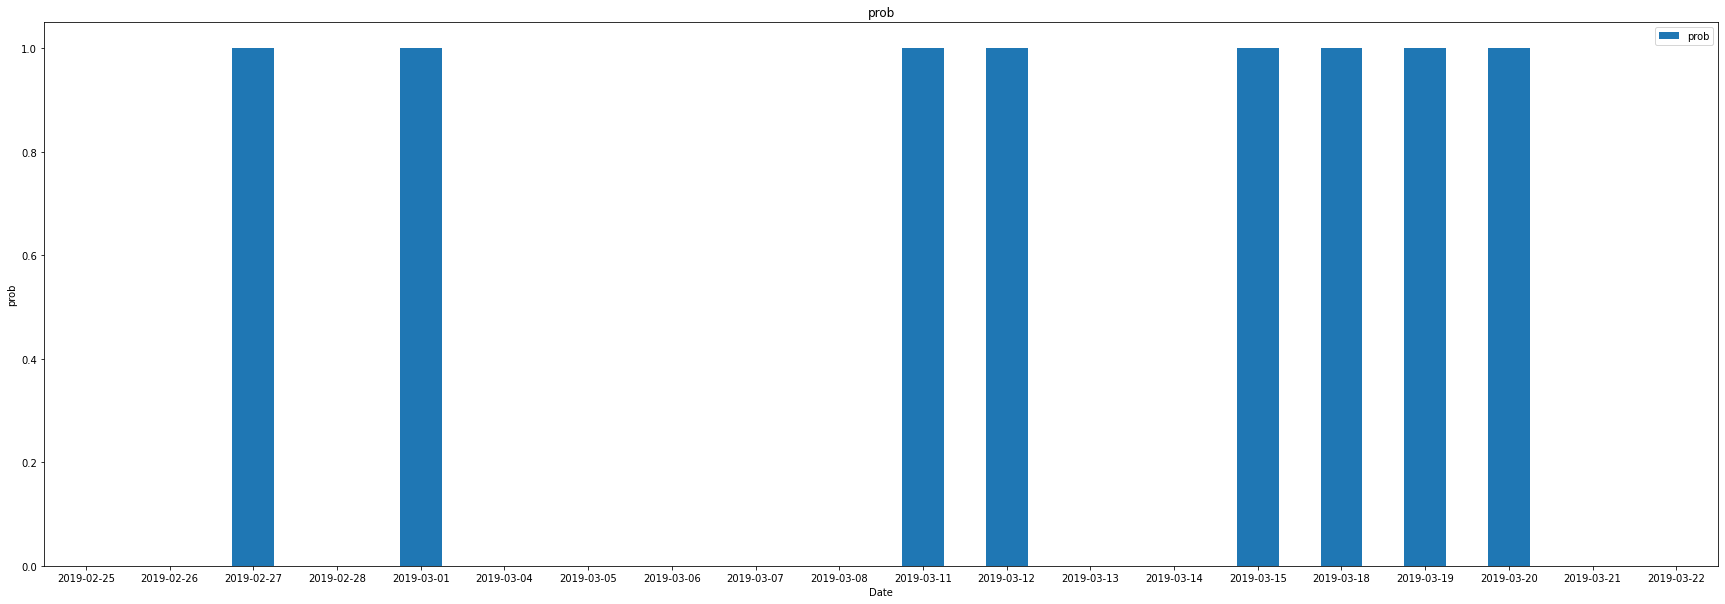

In [44]:
#bar plot prob column
df.plot(x='Date', y=['prob'], kind='bar', title="prob", figsize=(30,10), ylabel='prob', rot=0);